In [1]:
import numpy as np
import pandas as pd
import requests
import time, random
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline 

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data/insurance.csv', sep=','); #Lectura del csv

In [3]:
data['sex'] = data['sex'].replace({'female': 1, 'male': 2})
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 2})
data['region'] = data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


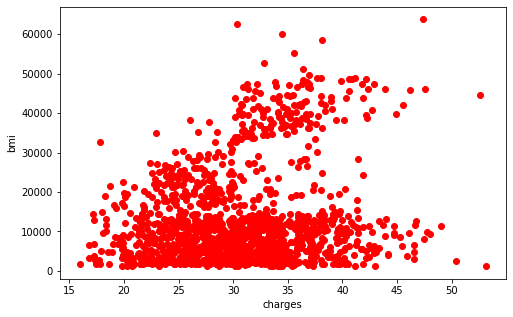

In [20]:
plt.figure(figsize=(8,5))
x_data, y_data = (data["bmi"].values, data["charges"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('bmi')
plt.xlabel('charges')
plt.show()

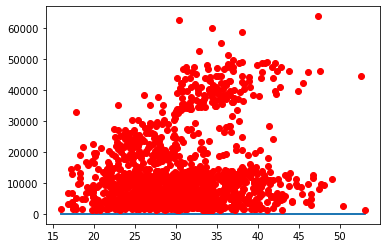

In [21]:
#define el modelo
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

#ejecutamos un primer modelo
beta_1 = 0.10
beta_2 = 1990.0

#función logística
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#predicción de puntos
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [22]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [23]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#imprimir los parámetros finales
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 1.900028, beta_2 = 1.287138


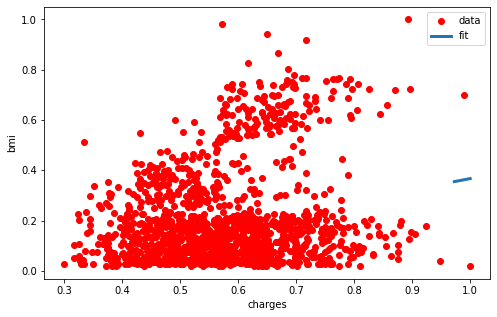

In [24]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('bmi')
plt.xlabel('charges')
plt.show()

In [26]:
# divide los datos en entrenamiento y prueba
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# construye el modelo utilizando el set de entrenamiento
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predecir utilizando el set de prueba
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Promedio de error absoluto: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Suma residual de cuadrados (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Promedio de error absoluto: 0.14
Suma residual de cuadrados (MSE): 0.03
R2-score: -21.19


In [30]:
import statsmodels.api as sm  
from sklearn.preprocessing import StandardScaler  
scale = StandardScaler()

# determinamos que queremos calcular (variable y)  
# y a partir de que caracteristicas (variable X)  
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  
y = data['charges']

# Aplicamos la funcion que nos normaliza automaticamente todos los valores  
# para que sean comparables y los coeficientes b1, b2 y b3 tengan sentido  
X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']] = scale.fit_transform(X[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].as_matrix())

print (X)


# Usamos el modelo Ordinary Least Square del paquete statsmodel y creamos el modelo  
# a partir de las caracteristicas de X y los valores del vector y  
est = sm.OLS(y, X).fit()

est.summary()

           age       sex       bmi  children    smoker    region
0    -1.438764 -1.010519 -0.453320 -0.908614 -1.970587 -1.343905
1    -1.509965  0.989591  0.509621 -0.078767  0.507463 -0.438495
2    -0.797954  0.989591  0.383307  1.580926  0.507463 -0.438495
3    -0.441948  0.989591 -1.305531 -0.908614  0.507463  0.466915
4    -0.513149  0.989591 -0.292556 -0.908614  0.507463  0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.466915
1334 -1.509965 -1.010519  0.206139 -0.908614  0.507463  1.372326
1335 -1.509965 -1.010519  1.014878 -0.908614  0.507463 -0.438495
1336 -1.296362 -1.010519 -0.797813 -0.908614  0.507463 -1.343905
1337  1.551686 -1.010519 -0.261388 -0.908614 -1.970587  0.466915

[1338 rows x 6 columns]


c:\users\david\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
c:\users\david\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\david\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.341
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              114.9
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                   6.36e-117
Time:                        11:34:20   Log-Likelihood:                         -14727.
No. Observations:                1338   AIC:                                  2.947e+04
Df Residuals:                    1332   BIC:                                  2.950e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age         3613.5362    402.605      8.975      0.000    2823.727    4403.345
sex          -65.5517    401.313     -0.163      0.870    -852.827     721.723
bmi         2027.3168    407.573      4.974      0.000    1227.762    2826.872
children     577.6603    400.037      1.444      0.149    -207.111    1362.432
smoker     -9612.5731    400.831    -23.982      0.000   -1.04e+04   -8826.244
region       390.5855    404.696      0.965      0.335    -403.325    1184.496
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         1.23
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Importaciones
import os
import pandas as pd
import seaborn as sns
import missingno as msno 

<AxesSubplot:>

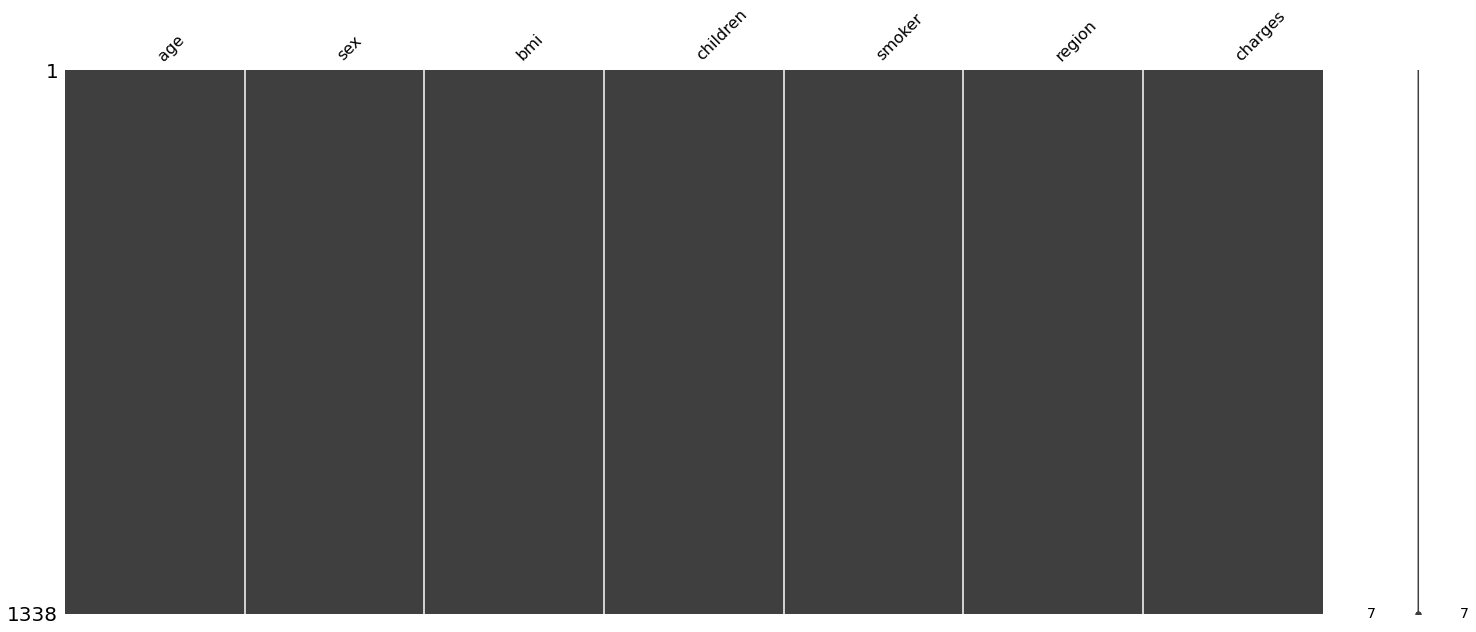

In [39]:
msno.matrix(data) 

<AxesSubplot:>

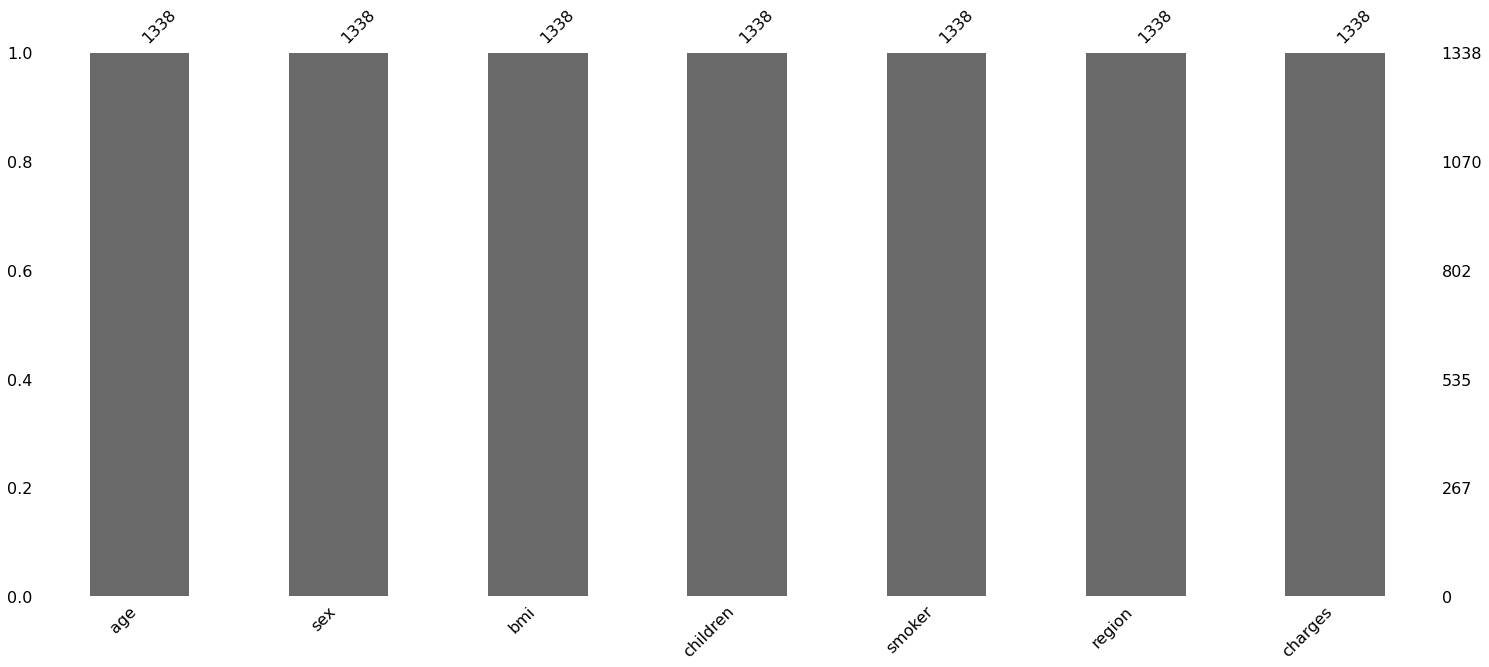

In [41]:
msno.bar(data)